# Lung Cancer Dataset
##### Author: Chenyang Skylar Li

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/CSkylarL/DataScience-MachineLearning/blob/main/data/lung_cancer/lung_cancer.ipynb)

# Table of Contents
1. [Introduction](#introduction)
2. [Load data](#load-data)
3. [Data information](#data-information)
4. [Data statistic description](#data-statistic-description)
5. [Data target distribution](#data-target-distribution)

## Introduction

I generated the `Lung Cancer` data as an example of high dimensional data with small sample size. It originates from [Broad Institute's Genome Data Analysis Center (GDAC)  Firehose](https://gdac.broadinstitute.org/), which is part of The Cancer Genome Atlas (TCGA) project, a collaboration between the National Cancer Institute (NCI) and the National Human Genome Research Institute (NHGRI) that has generated comprehensive, multi-dimensional maps of the key genomic changes in 33 types of cancer. 

The [data](./RSEM_gene_expression.csv) is generated by the following steps:
1. Download the `Lung Adenocarcinoma (LUAD)` data from [Broad Institute's GDAC Firehose](https://gdac.broadinstitute.org/).
2. Extract the RSEM normalized gene expression data data from the downloaded `tar.gz` file.
3. Filter out the genes with low expression level and transform the data into log10 scale.
3. Select 58 patients with paired `Normal` and `Primary Tumor` samples.
4. Select 1219 immune marker genes based on [Immune_Marker_n1293.rda](https://github.com/CSkylarL/TimiGP/blob/master/data/Immune_Marker_n1293.rda) of my package [TimiGP](https://github.com/CSkylarL/TimiGP)
5. The final data is a `1219 x 117` matrix, with 1219 immune marker genes as features and 116 samples. The first column is the gene names. The first 58 samples are `Normal` samples and the last 58 samples are `Primary Tumor` samples, with the same patient id.

The label(./label.csv) includes the below information in the same order as the data (except the first column):
- `Disease`: normal or tumor
- `Class`: 0 (normal) or 1(tumor), which is the target of the classification task
- `Patient`: the patient id simiply labeled as `1` to `58`
- `ID`: the sample id same as the column name of the data

I generated the data as an example of high dimensional data with small sample size.

## Load data

Note:
- The feature names are in the first row of the data, which should be dropped when training the model. The instance is the sample, not the gene. 
- The instance is the column of the data, not the row. So transpose the data may be needed.
- The samples are paired, so the data should be split into training and testing sets by patient id.



In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv("../../data/lung_cancer/RSEM_gene_expression.csv")
label = pd.read_csv("../../data/lung_cancer/label.csv")

# Display the shape of the data, target, and number of classes
print("Data shape:", data.shape)
print("Label shape:", label.shape)
print("Number of classes:", label['Class'].value_counts())
print("Number of Disease:", label['Disease'].value_counts())


Data shape: (1219, 117)
Label shape: (116, 4)
Number of classes: Class
0    58
1    58
Name: count, dtype: int64
Number of Disease: Disease
normal    58
tumor     58
Name: count, dtype: int64


In [24]:
data

,Gene,TCGA.38.4625.11A.01R.1758.07,TCGA.38.4626.11A.01R.1758.07,TCGA.38.4627.11A.01R.1758.07,TCGA.38.4632.11A.01R.1755.07,TCGA.44.2655.11A.01R.1758.07,TCGA.44.2657.11A.01R.1758.07,TCGA.44.2661.11A.01R.1758.07,TCGA.44.2662.11A.01R.1758.07,TCGA.44.2665.11A.01R.1758.07,...,TCGA.55.6985.01A.11R.1949.07,TCGA.55.6986.01A.11R.1949.07,TCGA.73.4676.01A.01R.1755.07,TCGA.91.6828.01A.11R.1858.07,TCGA.91.6829.01A.21R.1858.07,TCGA.91.6831.01A.11R.1858.07,TCGA.91.6835.01A.11R.1858.07,TCGA.91.6836.01A.21R.1858.07,TCGA.91.6847.01A.11R.1949.07,TCGA.91.6849.01A.11R.1949.07
0,ABAT,2.749067,2.818563,2.130852,2.675901,2.476561,2.546046,2.501046,2.458168,2.501574,...,2.597450,2.373767,1.797554,3.057824,2.856802,2.216461,2.535563,2.154110,1.690002,2.386484
1,ABCA1,3.074937,3.101565,2.696561,3.709566,3.396422,3.191824,3.383607,3.140389,3.264245,...,3.220674,3.057662,2.846861,3.415727,3.449180,3.017885,3.446460,2.977237,2.556070,2.845511
2,ABCB1,1.658831,1.590477,1.924151,1.897917,2.622722,1.972072,2.201384,1.822796,2.100671,...,1.891346,2.100371,1.393517,1.986591,1.826603,1.553020,2.267638,1.238575,0.948516,1.943312
3,ABCB4,0.559032,0.759169,0.499027,0.889038,0.855113,1.722575,1.182808,0.680961,0.616570,...,1.713879,0.953963,1.183213,1.459058,1.551323,1.382964,2.076584,1.478760,0.307089,1.424620
4,ABCC4,2.905619,2.722539,2.759940,2.854329,2.801860,3.006077,2.871298,2.943532,3.078281,...,2.794759,2.375100,2.804779,3.117803,2.909029,2.871238,3.101818,3.042187,3.683577,3.414880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,ZNF528,2.280087,2.327623,2.156074,2.139354,2.415254,2.281253,2.429098,2.271950,2.323780,...,2.519632,2.633245,1.934298,2.356850,2.566530,2.234410,2.395947,2.185212,2.803707,1.726567
1215,ZNF609,2.888922,2.956729,2.711820,2.788068,3.192098,3.126805,3.220777,3.207828,3.231149,...,3.045305,3.190652,2.898162,3.339352,3.089801,3.279700,3.250146,3.164412,2.975339,3.013741
1216,ZNF747,2.472255,2.467453,2.426196,2.391035,2.459334,2.424700,2.388485,2.366936,2.417614,...,2.399002,2.461424,2.221067,2.313281,2.268880,2.731375,2.260830,2.187494,2.334461,2.303773
1217,ZNF764,2.230390,2.231224,2.069597,2.017479,2.348671,2.312443,2.221640,2.098115,2.242709,...,2.413650,2.266858,1.928933,2.275796,2.132722,2.623314,2.330602,2.421444,2.176307,2.192055


In [25]:
label

,Disease,Class,Patient,ID
0,normal,0,1,TCGA.38.4625.11A.01R.1758.07
1,normal,0,2,TCGA.38.4626.11A.01R.1758.07
2,normal,0,3,TCGA.38.4627.11A.01R.1758.07
3,normal,0,4,TCGA.38.4632.11A.01R.1755.07
4,normal,0,5,TCGA.44.2655.11A.01R.1758.07
...,...,...,...,...
111,tumor,1,54,TCGA.91.6831.01A.11R.1858.07
112,tumor,1,55,TCGA.91.6835.01A.11R.1858.07
113,tumor,1,56,TCGA.91.6836.01A.21R.1858.07
114,tumor,1,57,TCGA.91.6847.01A.11R.1949.07


## Data information

Here is brief information about the dataset:

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Columns: 117 entries, Gene to TCGA.91.6849.01A.11R.1949.07
dtypes: float64(116), object(1)
memory usage: 1.1+ MB


## Data statistic description

Here is the statistic description of the dataset:

In [27]:
data.describe()

,TCGA.38.4625.11A.01R.1758.07,TCGA.38.4626.11A.01R.1758.07,TCGA.38.4627.11A.01R.1758.07,TCGA.38.4632.11A.01R.1755.07,TCGA.44.2655.11A.01R.1758.07,TCGA.44.2657.11A.01R.1758.07,TCGA.44.2661.11A.01R.1758.07,TCGA.44.2662.11A.01R.1758.07,TCGA.44.2665.11A.01R.1758.07,TCGA.44.2668.11A.01R.1758.07,...,TCGA.55.6985.01A.11R.1949.07,TCGA.55.6986.01A.11R.1949.07,TCGA.73.4676.01A.01R.1755.07,TCGA.91.6828.01A.11R.1858.07,TCGA.91.6829.01A.21R.1858.07,TCGA.91.6831.01A.11R.1858.07,TCGA.91.6835.01A.11R.1858.07,TCGA.91.6836.01A.21R.1858.07,TCGA.91.6847.01A.11R.1949.07,TCGA.91.6849.01A.11R.1949.07
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,...,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,2.488596,2.539603,2.522355,2.549491,2.450227,2.627078,2.511706,2.529268,2.456438,2.525869,...,2.512653,2.351159,2.334694,2.455489,2.346833,2.369765,2.587941,2.239468,2.035640,2.402007
std,1.023946,1.019206,0.997788,0.978063,1.006056,0.893314,0.983317,1.012541,1.023383,1.016549,...,0.917718,1.004045,1.037364,0.957917,1.026256,0.996162,0.899314,1.025610,1.162749,1.011987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.830508,1.879669,1.956356,1.970844,1.839508,2.208923,1.949436,1.933622,1.812493,1.920021,...,1.989633,1.714934,1.666355,1.910411,1.676361,1.743567,2.177349,1.509457,1.028334,1.801345
50%,2.668007,2.698469,2.669374,2.694052,2.624949,2.761423,2.673196,2.688796,2.624498,2.694805,...,2.641045,2.487081,2.497561,2.602962,2.556687,2.537101,2.720286,2.337631,2.202291,2.555307
75%,3.199547,3.247314,3.194925,3.193962,3.181913,3.209273,3.201517,3.228103,3.192061,3.233844,...,3.151155,3.061777,3.052885,3.113070,3.087882,3.074377,3.179308,3.002431,2.967791,3.095419
max,5.434138,5.620465,5.564116,5.836177,4.948623,5.207432,5.093396,5.141953,5.254132,5.287446,...,4.900633,5.155908,5.491027,4.804085,5.251186,5.276580,4.845851,5.015484,5.120091,5.260710


## Data target distribution

Here is the target distribution of the dataset:

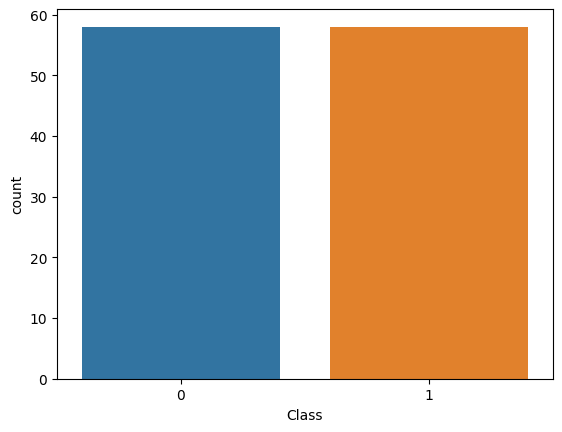

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=label['Class'])
plt.show()